In [282]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#import pandas as pd
import sklearn
from sklearn import linear_model
#from sklearn.datasets import make_classification
import random

### Get the data.

In [283]:
gpa_list=[3.0,3.7,3.3,2.5,4.0,3.2,3.9,3.0]
hours_list=[2,8,3,1,12,7,9,5]

### Train Test Split

In the spirit of writing reusable code, I treated the data as if there was a lot more than $8$ data points.  To this end, I combined the data into a list of data points so that I could take a random sample to use for training and use what is left over for testing.

In [284]:
#points=zip(hours_list, gpa_list)
data_points=list(zip(hours_list, gpa_list))

In [285]:
train_points=random.sample(data_points, 4)
train_points

[(7, 3.2), (3, 3.3), (2, 3.0), (12, 4.0)]

In [286]:
test_points=[point for point in data_points if point not in train_points]
test_points

[(8, 3.7), (1, 2.5), (9, 3.9), (5, 3.0)]

### Unpacking the Data Points

First unpack the training data.

In [287]:
train_unzipped=list(zip(*train_points))
train_unzipped

[(7, 3, 2, 12), (3.2, 3.3, 3.0, 4.0)]

In [288]:
train_hours_list=list(train_unzipped[0])

In [289]:
train_gpa_list=list(train_unzipped[1])

Next unpack the testing data.

In [290]:
test_unzipped=list(zip(*test_points))

In [291]:
test_hours_list=list(test_unzipped[0])

In [292]:
test_gpa_list=list(test_unzipped[1])

### Prep Train and Test Sets for Modelling

Since the Scikit LinearRegression.fit() method takes an array as parameters, I now turn training and test sets into $n \times 1$ arrays.

In [293]:
gpa_train=np.array([[x] for x in train_gpa_list])
gpa_train

array([[3.2],
       [3.3],
       [3. ],
       [4. ]])

In [294]:
hours_train=np.array([[y] for y in train_hours_list])
hours_train

array([[ 7],
       [ 3],
       [ 2],
       [12]])

In [295]:
gpa_test=np.array([[x] for x in test_gpa_list])
gpa_test

array([[3.7],
       [2.5],
       [3.9],
       [3. ]])

In [296]:
hours_test=np.array([[y] for y in test_hours_list])
hours_test

array([[8],
       [1],
       [9],
       [5]])

### Training

In [297]:
model=linear_model.LinearRegression()

In [298]:
model.fit(hours_train, gpa_train)

LinearRegression()

### Testing

In [299]:
y_pred=model.predict(hours_test)

In [300]:
model.score(y_pred,gpa_test) 

0.027800225646605448

### Graphing

To draw my model I chose two theoretical hours, one below and one above the actual hours data, and then predicted their y values using the predict method.  Plotting these points with the matplotlib.pyplot plot method then draws my model.

In [301]:
X_draw=np.array([[0.0],[14]])
X_draw

array([[ 0.],
       [14.]])

In [302]:
y_draw=model.predict(X_draw)

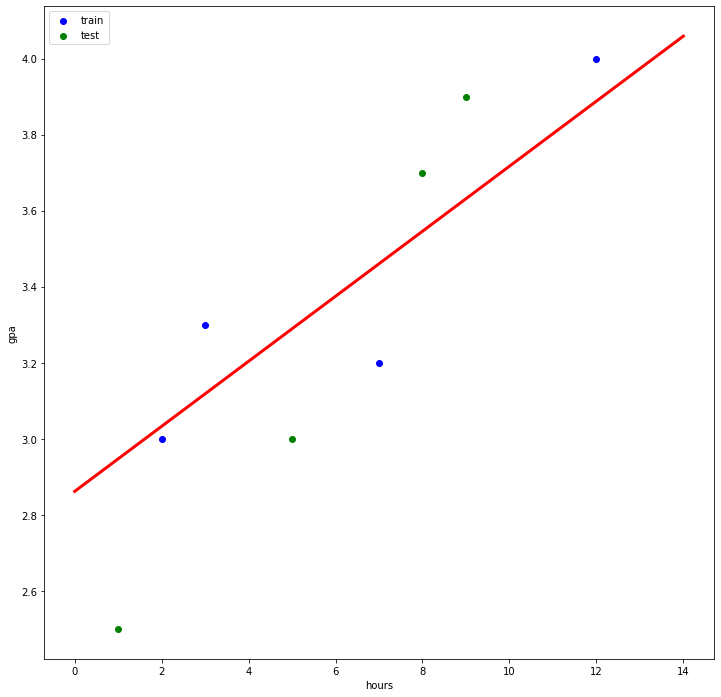

In [303]:
fig=plt.figure(figsize=(12,12))
ax1=fig.add_subplot(1,1,1)

ax1.set_xlabel("hours")
ax1.set_ylabel("gpa")
ax1.scatter(train_hours_list, train_gpa_list,  color='blue', label="train")
ax1.scatter(test_hours_list, test_gpa_list,  color='green', label="test")

ax1.legend(loc="best")

plt.plot(X_draw, y_draw, color='red', linewidth=3)
